## DATA SCIENCE APPLICATION IN MARKETING DEPARTMENT

#### Source of the dataset: https://www.kaggle.com/arjunbhasin2013/ccdata



### This case presents a customer segmentation to define marketing strategy using K-means, principal component analysis (PCA) and autoencoders. 

In [74]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [75]:
# Open the CSV file contaning the dataset
creditcard_df = pd.read_csv('/home/andre/Desktop/DataScience/Curso Ciência de dados para empresas e negócios/Departamento de vendas/CC GENERAL.csv')

In [76]:
# Removing the warning messages 
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [77]:
# Return a tuple representing the dimensionality of the DataFrame.
creditcard_df.shape

(8950, 18)

In [78]:
# Show the first five registers from dataframe.
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [79]:
# Prints information about the DataFrame.
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [80]:
# Generate descriptive statistics from dataframe.
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### ONEOFF_PURCHASES.
#### Means Maximum purchase amount done in one-go (In Portuguese: Valor máximo de compra feito de uma só vez)

In [81]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


### CASH_ADVANCE
#### Cash in advance given by the user (in Portuguese: Dinheiro adiantado dado pelo usuário)

In [82]:
creditcard_df['CASH_ADVANCE'].max() # Max(). Return the maximum of the values over the requested axis.

47137.21176

In [83]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### Data visualization and exploration

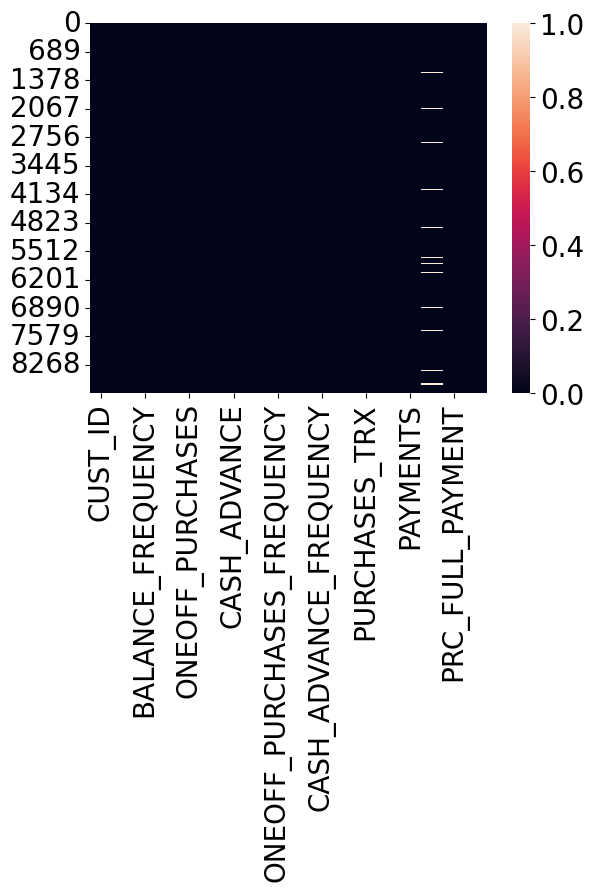

In [84]:
# Checks for the presence of null values in the dataframe
sns.heatmap(creditcard_df.isnull()); # isnull() returns null values.

In [85]:
# sum the null records
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Data Treatment and Transformation of null records

### MINIMUM_PAYMENTS.
#### Minimum amount of payments made by user

In [86]:
creditcard_df['MINIMUM_PAYMENTS'].mean() # It Estimates the mean for MINIMUM_PAYMENTS

864.2065423050828

In [87]:
# Finds the null records and replaces them with the mean.
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

### CREDIT_LIMIT.
#### Limit of Credit Card for user

In [88]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [89]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [90]:
# sum the null records
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

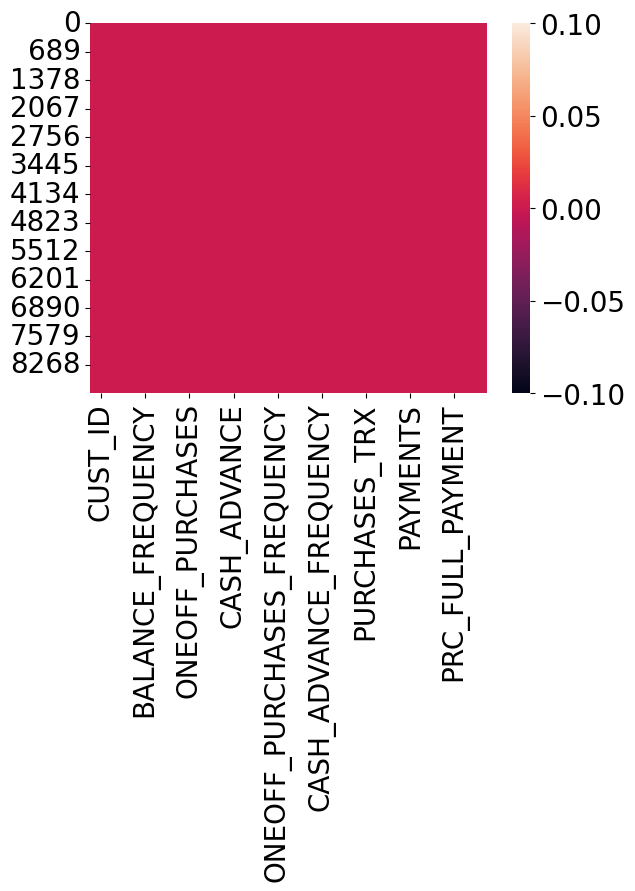

In [91]:
# Checks for the presence of null values in the dataframe
sns.heatmap(creditcard_df.isnull()); # isnull() returns null values.

In [92]:
# duplicated(). It verify if there are duplicate records
creditcard_df.duplicated().sum()

0

In [93]:
# axis = 1. to drop labels from the columns (1 or ‘columns’).
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [94]:
# Show the first five registers from dataframe.
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [95]:
# Show the column labels of the DataFrame.
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [96]:
len(creditcard_df.columns)

17

In [97]:
# histplot(). Plot univariate or bivariate histograms to show distributions of datasets.

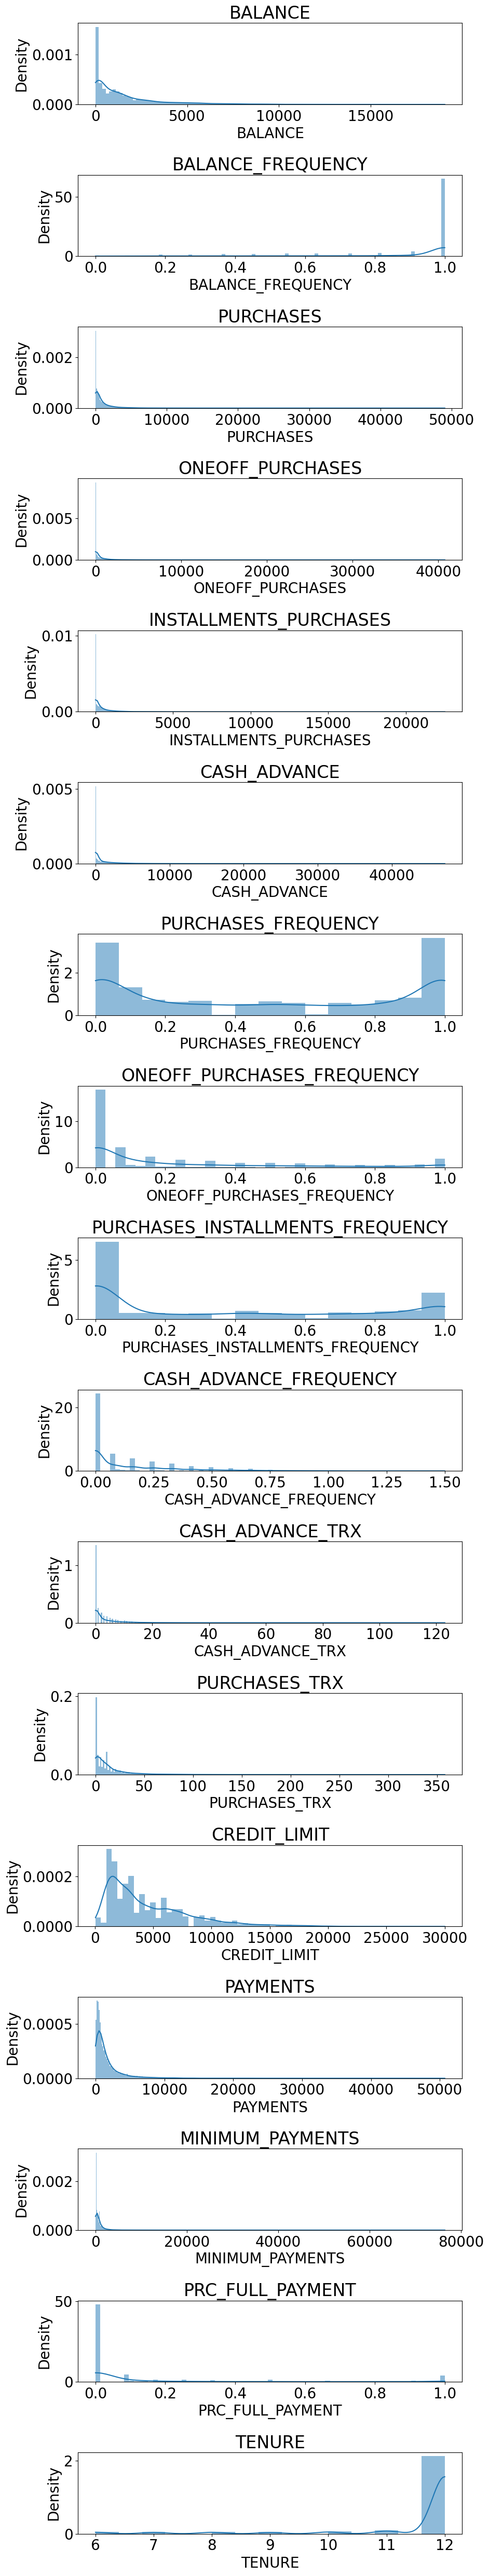

In [98]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.histplot(creditcard_df[creditcard_df.columns[i]], kde = True, stat="density", linewidth=0)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

In [99]:
# corr(). Compute pairwise correlation of columns, excluding NA/null values.
correlations = creditcard_df.corr(method='pearson')

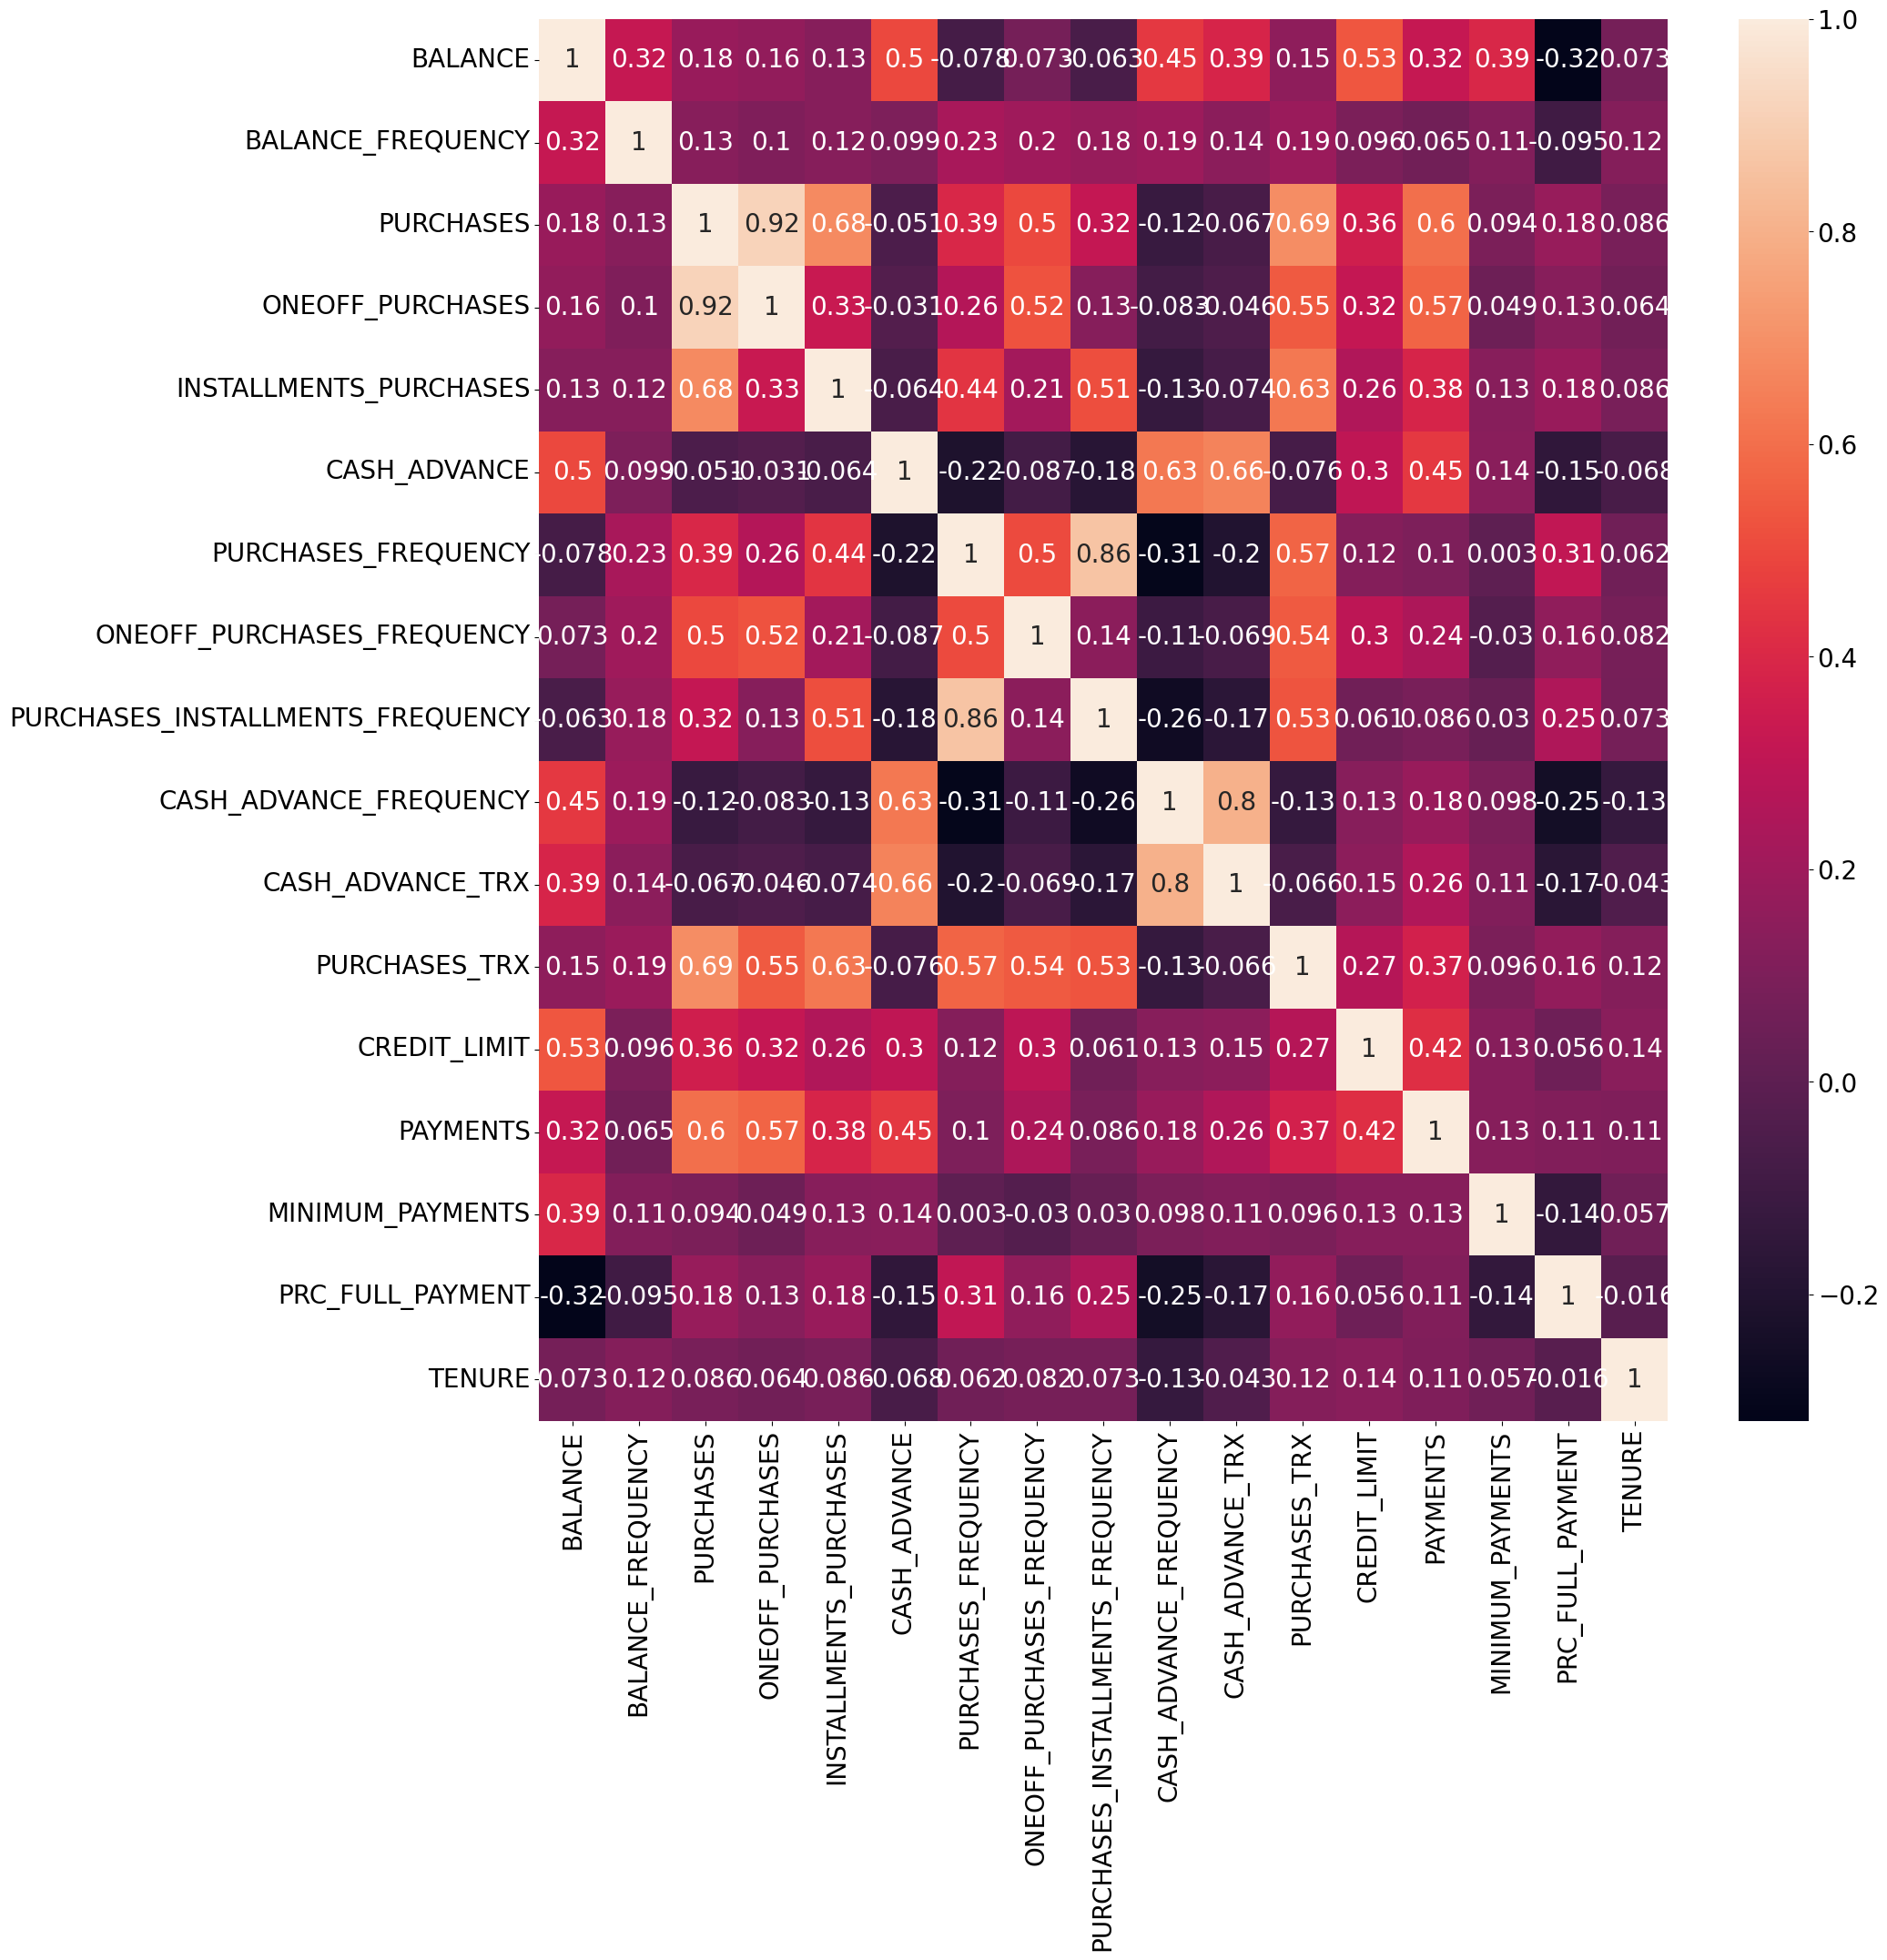

In [100]:
plt.rcParams.update({'font.size': 20})
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);
# heatmap() Plot rectangular data as a color-encoded matrix.

## Defining the number of clusters using the Elbow Method

### BALANCE.
#### Balance amount left in their account to make purchases (In Portuguese: Valor do saldo deixado em sua conta para fazer compras) 

In [101]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [102]:
# StandardScaler. It is based on mean and standard deviation, useful when there are many outliers.

In [103]:
# StandardScaler. Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [104]:
# The type() function is used to get the type of an object.
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [105]:
# Shows the minimum and maximum values
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [106]:
# Data transformed by StandardScaler
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### In K-means, each cluster is represented by its center (called a “centroid”), which corresponds to the arithmetic mean of data points assigned to the cluster.

### A centroid is a data point that represents the center of the cluster (the mean), and it might not necessarily be a member of the dataset.

In [107]:
# WCSS = Within Cluster Sum of Squares
wcss_1 = [] # For Elbow method
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled) # Compute k-means clustering.
  wcss_1.append(kmeans.inertia_)

In [108]:
# WCSS measures the squared average distance of all the points within a cluster to the cluster centroid.

In [109]:
# To calculate WCSS, you first find the Euclidean distance between a given point and the centroid to which it is assigned. 
# You then iterate this process for all points in the cluster, and then sum the values for the cluster and divide by the number of points. Finally, you calculate the average across all clusters. 
# This will give you the average WCSS.

In [110]:
# inertia_ : float. Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided. 

In [111]:
print(wcss_1)

[152150.0000000002, 127784.85206054164, 111986.43695139143, 99073.93826774828, 91503.30304224892, 84852.47540636091, 79532.40973829053, 74624.41376193655, 69844.81314030444, 66465.85212544387, 63782.95787264056, 61363.58465767215, 59150.51526734261, 57502.39463192396, 55920.05966564146, 54627.150203154306, 52995.58701002679, 52035.64450130054, 50813.56204048756]


In [112]:
len(wcss_1)

19

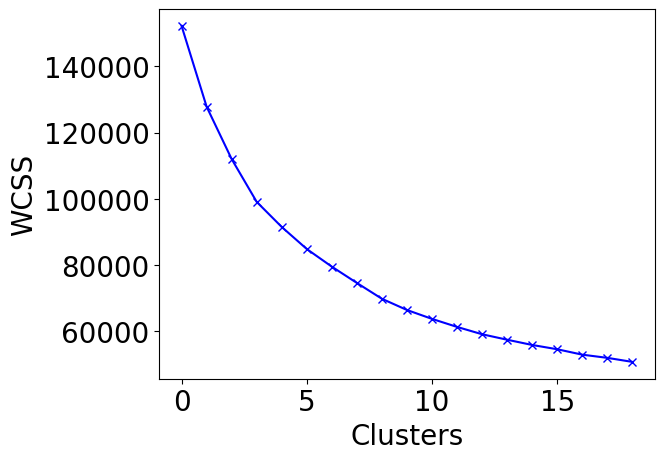

In [113]:
# 'bx-' this parameter puts an "x" over the value in the graph to make it easier to visualization
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Clustering with k-means

In [114]:
# K-means uses the Euclidean distance
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled) # fit will create the centroids and recalculate the means, until it places the records in each group
labels = kmeans.labels_   # show which group each customer belongs to (labels_)

In [115]:
# len here returns the number of customers.
labels, len(labels)

(array([2, 3, 4, ..., 6, 6, 6], dtype=int32), 8950)

In [116]:
# Show the number of customers per group
# unique(). Find the unique elements of an array.
# return_countsbool is a parameter of unique(), it is optional, if True, also return the number of times each unique item appears in input array.
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2025,   80, 2825,  881, 1269, 1186,  629,   55]))

In [117]:
kmeans.cluster_centers_  # Will show the centroids, several vectors containing the attributes.

array([[-3.82847236e-01,  3.28902119e-01, -4.05728906e-02,
        -2.32904244e-01,  3.31786169e-01, -3.68617396e-01,
         9.80272396e-01, -3.53020127e-01,  1.17078118e+00,
        -4.77801555e-01, -3.62709110e-01,  1.68581912e-01,
        -2.77454055e-01, -2.24877405e-01, -1.10085662e-01,
         3.17913622e-01,  2.51345194e-01],
       [ 1.37449127e+00,  4.12070299e-01,  7.17749253e+00,
         6.38420216e+00,  5.23954467e+00,  1.60504185e-02,
         1.08245404e+00,  1.91751189e+00,  1.03176877e+00,
        -2.90144496e-01, -1.07898325e-01,  4.78662783e+00,
         2.18104954e+00,  4.96236380e+00,  7.09040370e-01,
         8.64672739e-01,  3.32658000e-01],
       [ 4.85784245e-03,  4.01882899e-01, -3.43086346e-01,
        -2.24217498e-01, -3.99186220e-01, -1.05177318e-01,
        -8.07651193e-01, -3.33478814e-01, -7.51713138e-01,
         8.21623838e-02, -4.27903424e-02, -4.64351621e-01,
        -3.00447662e-01, -2.48336090e-01, -6.32972841e-02,
        -4.52230570e-01,  2.7

In [118]:
# Shows the transformed data, however, to better visualize it for decision making, it is better to look at the originals
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.382847,0.328902,-0.040573,-0.232904,0.331786,-0.368617,0.980272,-0.353020,1.170781,-0.477802,-0.362709,0.168582,-0.277454,-0.224877,-0.110086,0.317914,0.251345
1,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658
2,0.004858,0.401883,-0.343086,-0.224217,-0.399186,-0.105177,-0.807651,-0.333479,-0.751713,0.082162,-0.042790,-0.464352,-0.300448,-0.248336,-0.063297,-0.452231,0.271804
3,1.647251,0.391840,-0.204978,-0.148247,-0.212392,2.014846,-0.457145,-0.186424,-0.405609,1.940878,1.948600,-0.237806,1.014098,0.843375,0.372160,-0.388052,0.066878
4,0.143285,0.430310,0.947150,0.900579,0.584985,-0.304539,1.094633,1.869322,0.541285,-0.404025,-0.315019,1.202388,0.709799,0.398158,-0.050797,0.453246,0.307809
5,-0.701894,-2.135494,-0.307095,-0.230581,-0.302387,-0.322957,-0.547410,-0.428870,-0.441051,-0.522120,-0.376732,-0.416657,-0.172121,-0.201648,-0.257506,0.295702,0.201907
6,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
7,1.135598,0.469242,-0.074806,-0.296769,0.367637,-0.042415,-0.071366,-0.559998,0.167464,-0.152910,-0.047119,0.078970,-0.095920,-0.076995,9.436581,-0.520371,0.292749


#### Decisions taken as a result of the analysis:

- Group 0 (VIP/Prime): high card limit (15570) and highest percentage of full invoice payment (0.47). Increase card limit and shopping habit

- Group 3: Customers who pay little interest to the bank and are careful with their money. They have less money in their checking account (104) and they don't withdraw much money from their card limit (302). 23% payment of full credit card bill

- Group 5: use the credit card as a "loan" (most profitable sector for the bank), have a lot of money in the current account (5119) and withdraw a lot of money from the credit card (5246), buy little (0.3) and use quite the card limit for withdrawals (0.51). They pay very little the complete bill (0.03)

- Group 7 (new customers): newer customers (7.23) who keep little money in their current account (863)

In [119]:
# Displays the original data within the dataframe
# Parameter inverse_transform of StandardScaler: Scale back the data to the original representation.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,767.610621,0.955185,916.520227,205.864029,711.097761,205.863214,0.883781,0.097145,0.829736,0.039531,0.773604,18.900148,3484.958083,1082.145799,607.656550,0.246699,11.853683
1,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,0.406617,11.962500
2,1574.586017,0.972473,270.195568,220.282248,50.088499,758.309364,0.166201,0.102974,0.065687,0.151586,2.956814,3.167788,3401.297935,1014.235204,716.694892,0.021445,11.881062
3,4993.088265,0.970094,565.265977,346.376898,219.004614,5204.098000,0.306876,0.146844,0.203238,0.523534,16.546591,8.798864,8184.152893,4174.632024,1731.509208,0.040216,11.606818
4,1862.710426,0.979207,3026.804811,2087.214426,940.062083,340.238111,0.929679,0.760113,0.579558,0.054295,1.099057,44.596698,7076.986850,2885.772582,745.825703,0.286281,11.929245
5,103.540821,0.371392,347.092201,209.719739,137.622715,301.615215,0.270648,0.074517,0.189152,0.030663,0.677909,4.353288,3868.203579,1149.392761,264.100759,0.240202,11.787521
6,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
7,3928.125451,0.988430,843.379636,99.862000,743.517636,889.924775,0.461708,0.035399,0.430992,0.104545,2.927273,16.672727,4145.454545,1510.251238,22855.761083,0.001515,11.909091


In [120]:
labels, len(labels)

(array([2, 3, 4, ..., 6, 6, 6], dtype=int32), 8950)

In [121]:
# Inserts in the original dataframe the information of the groups classified by K-means
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


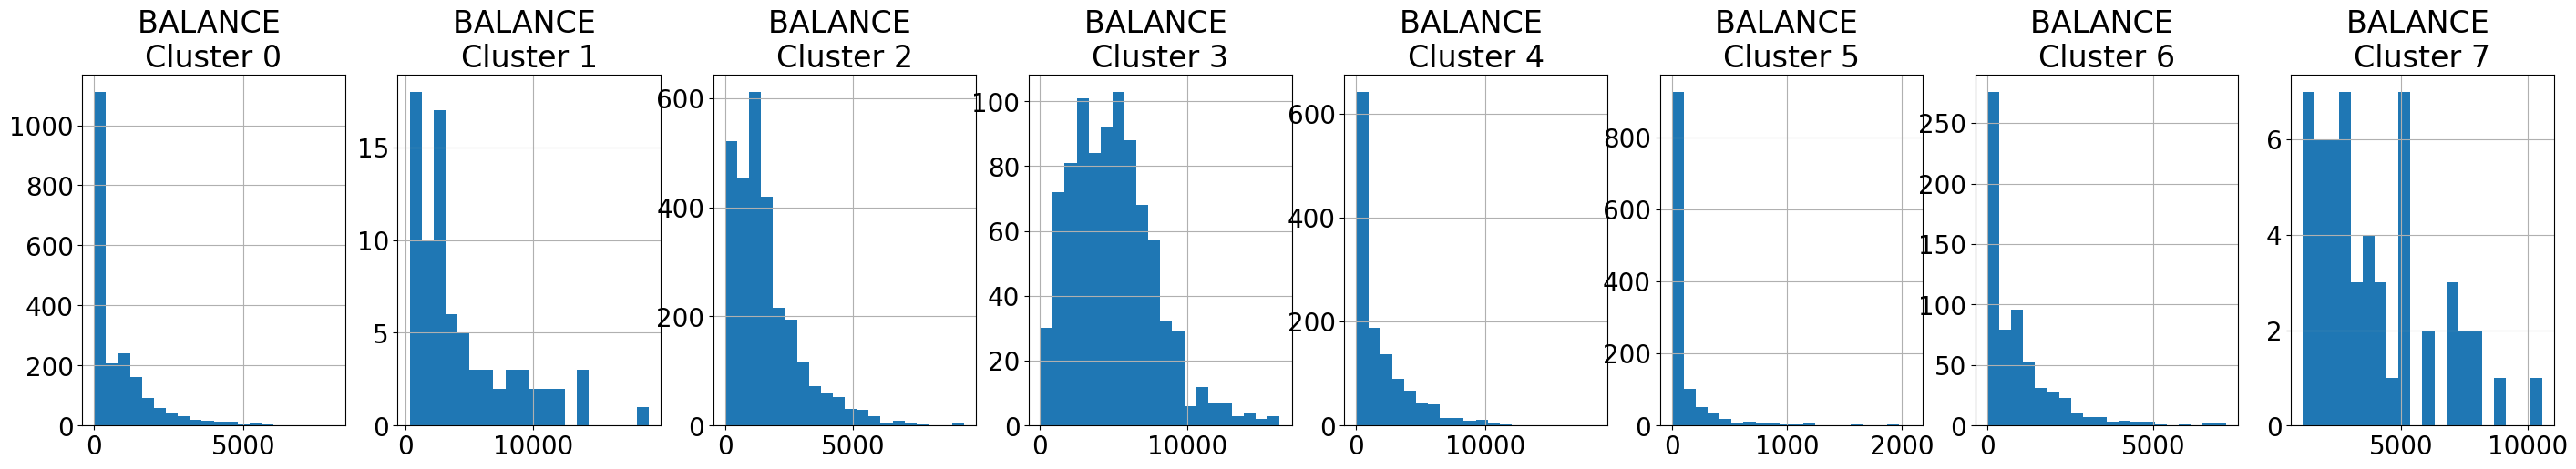

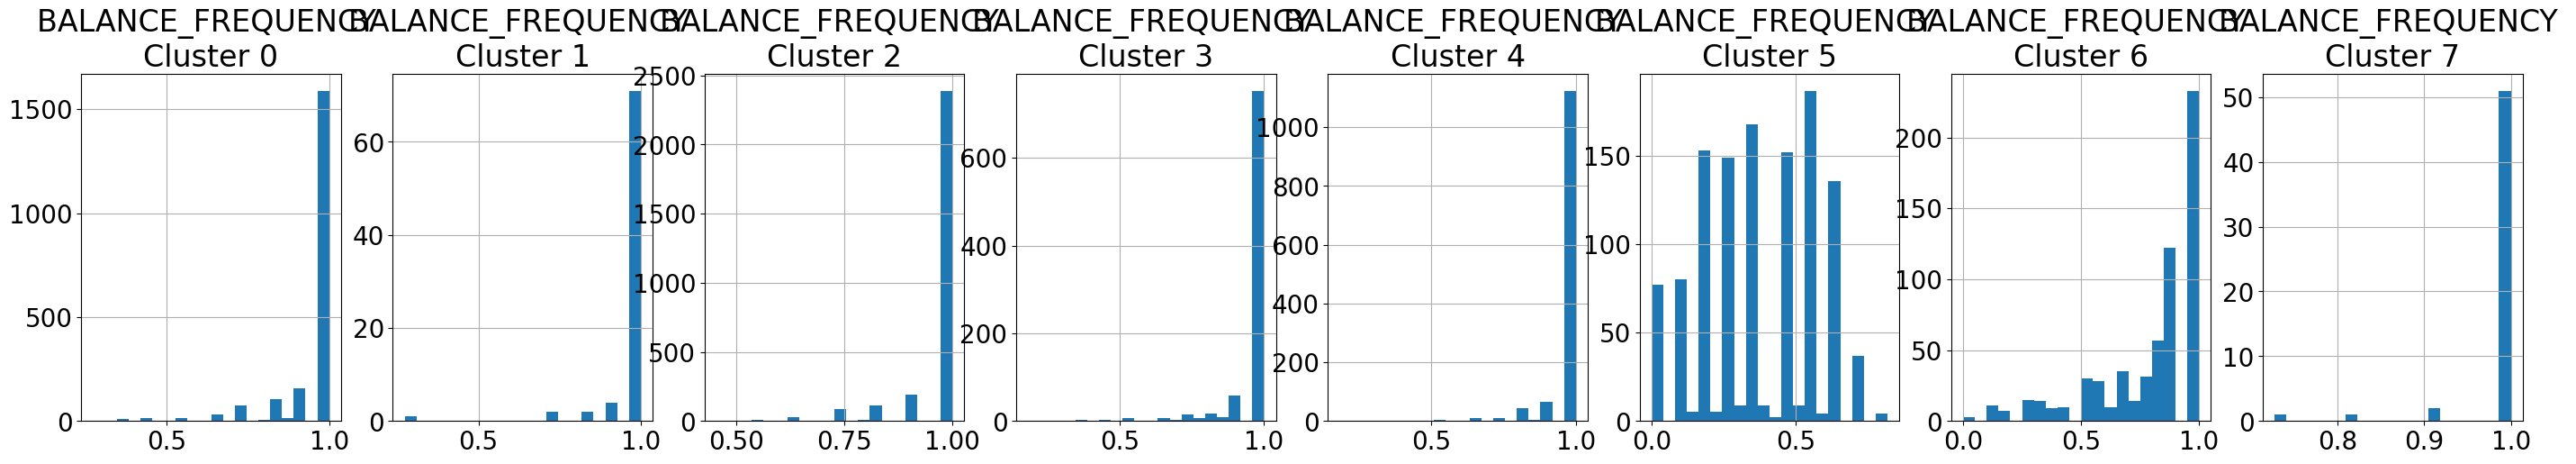

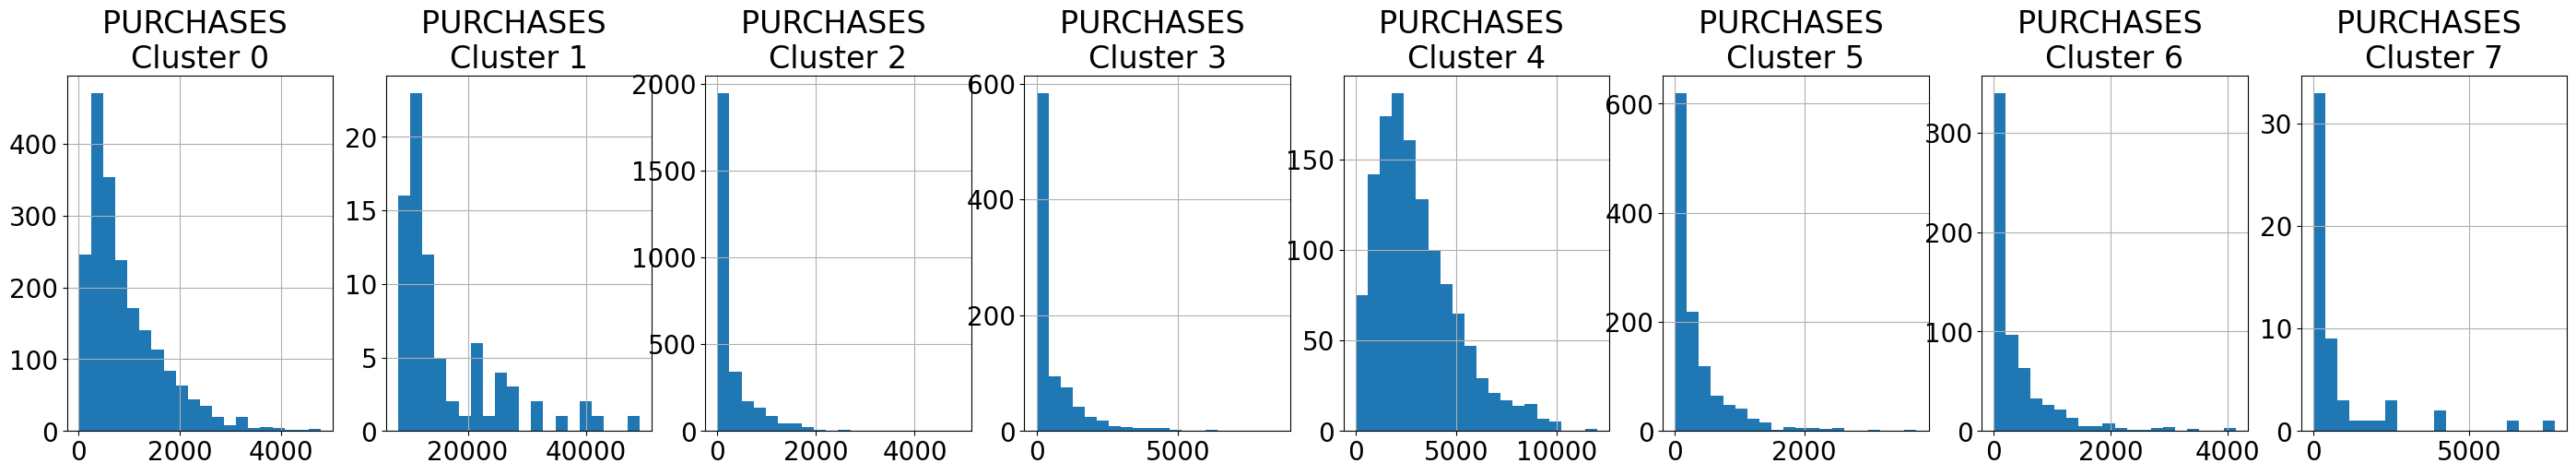

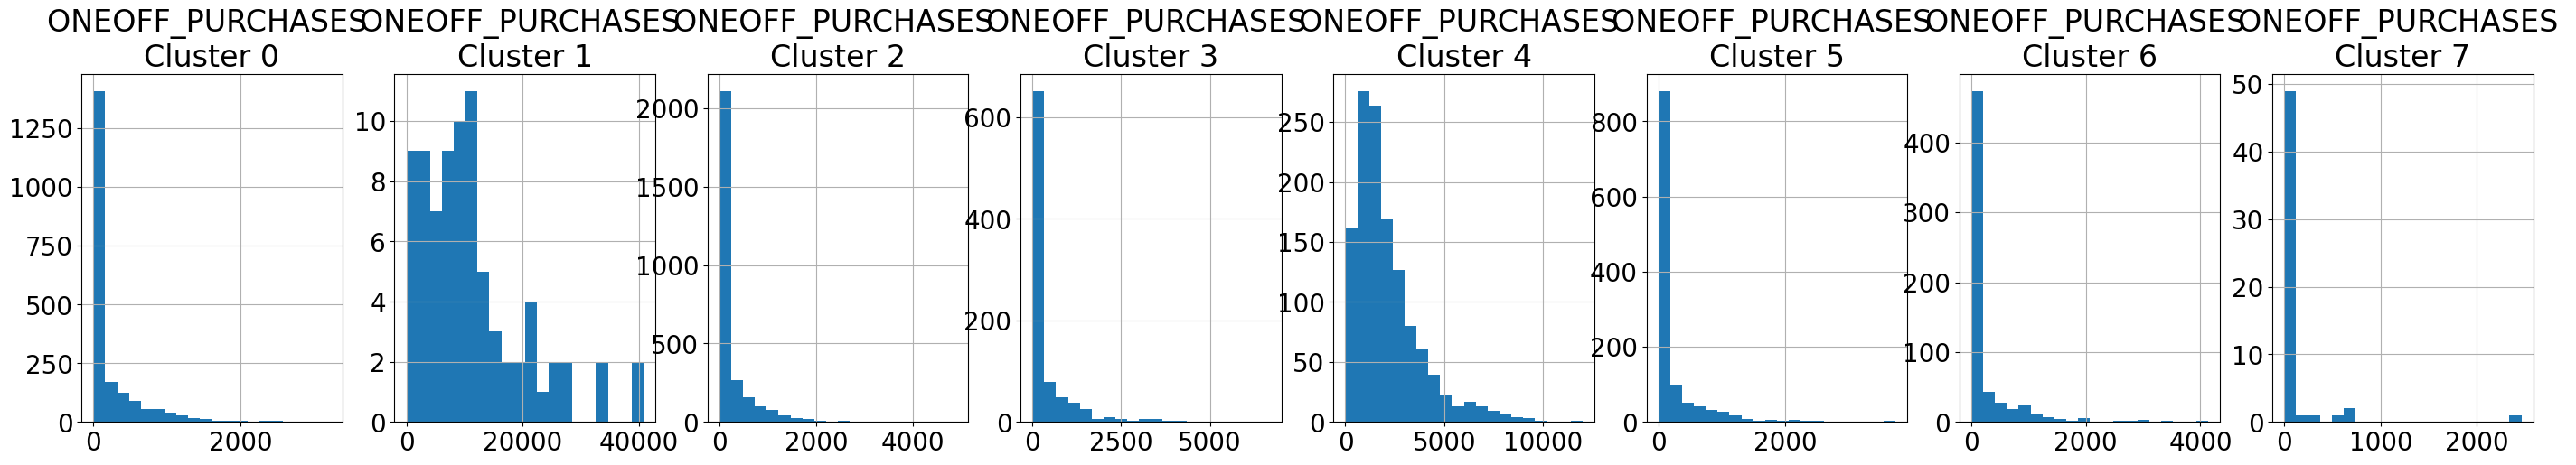

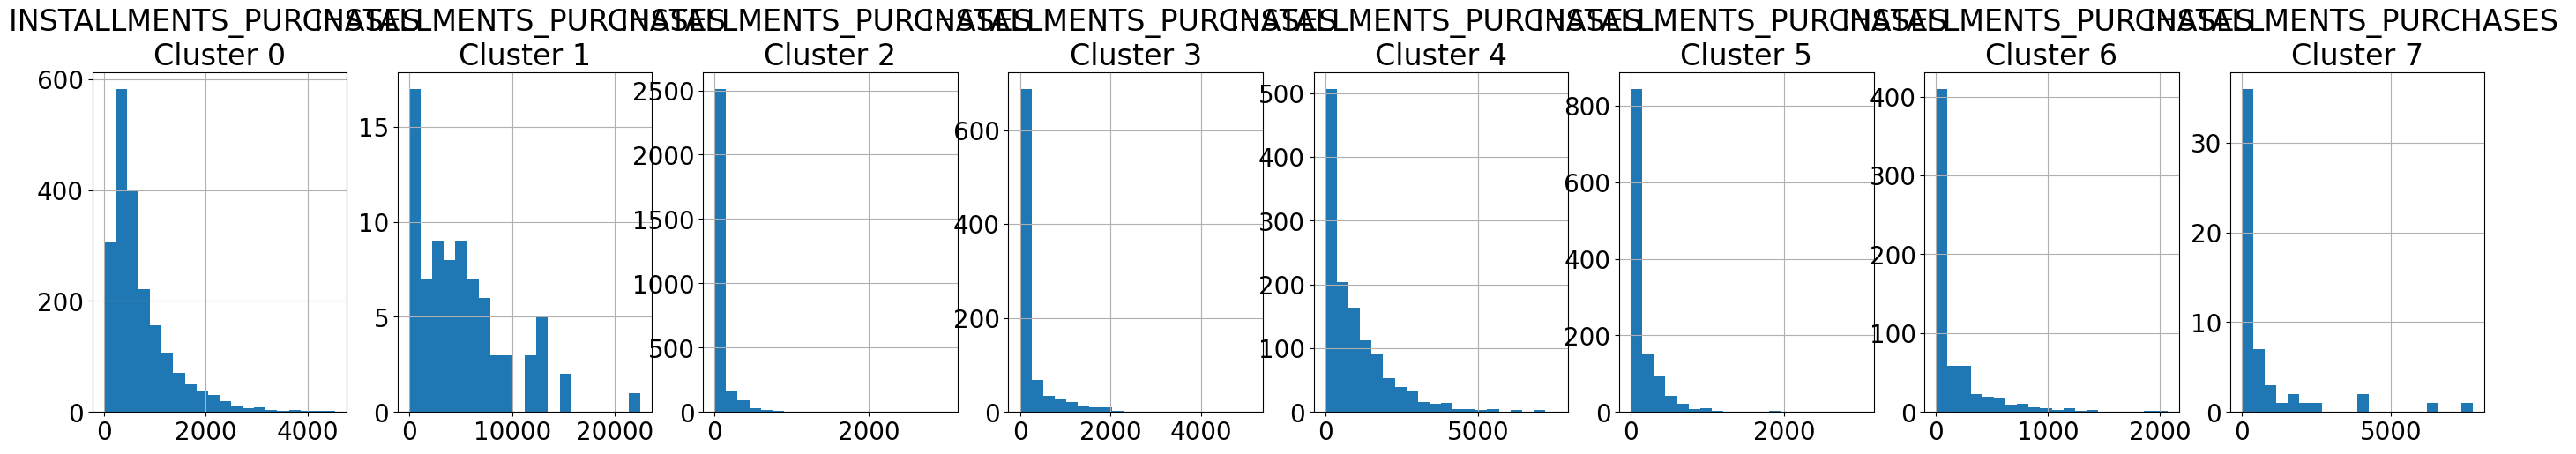

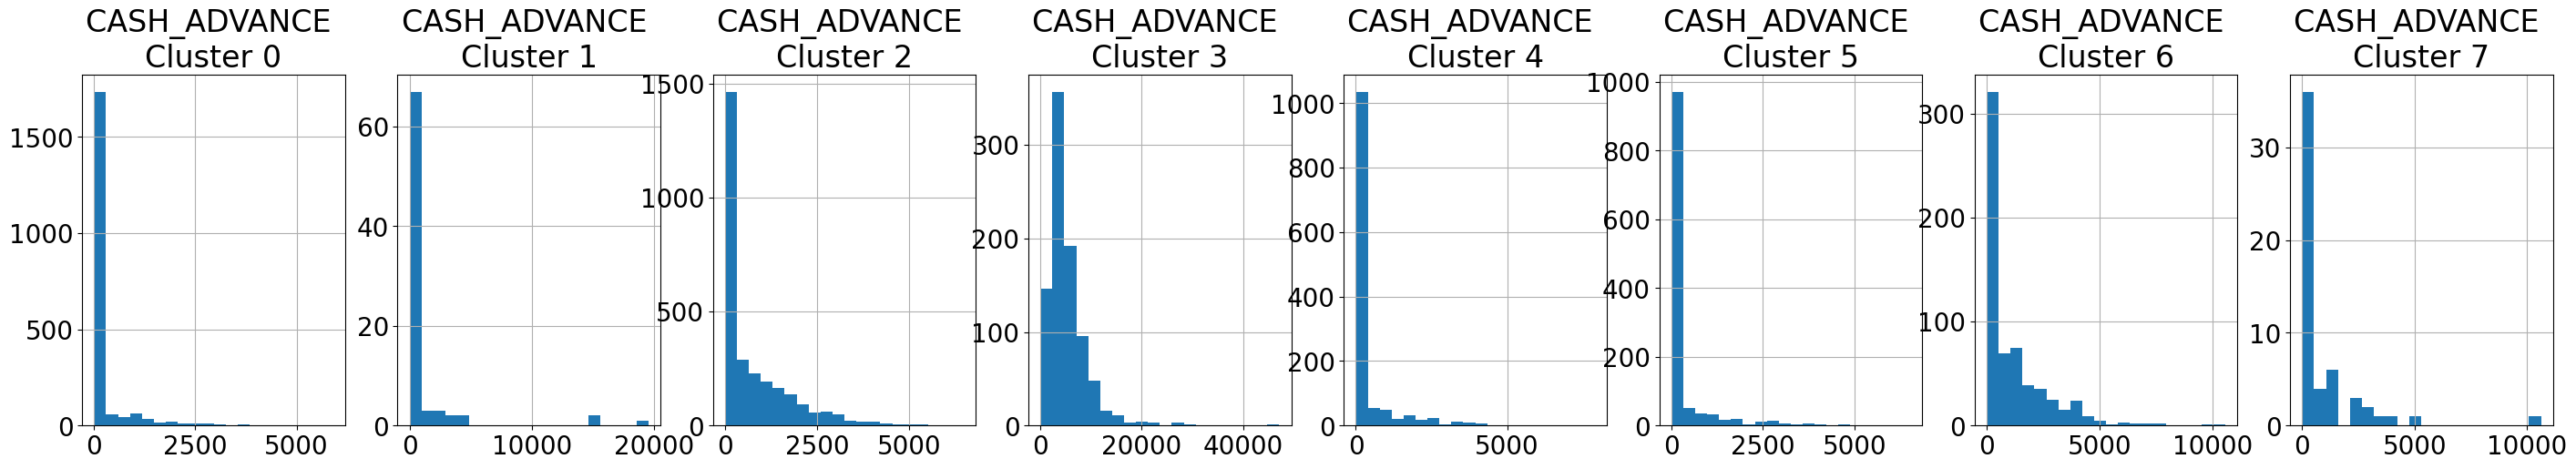

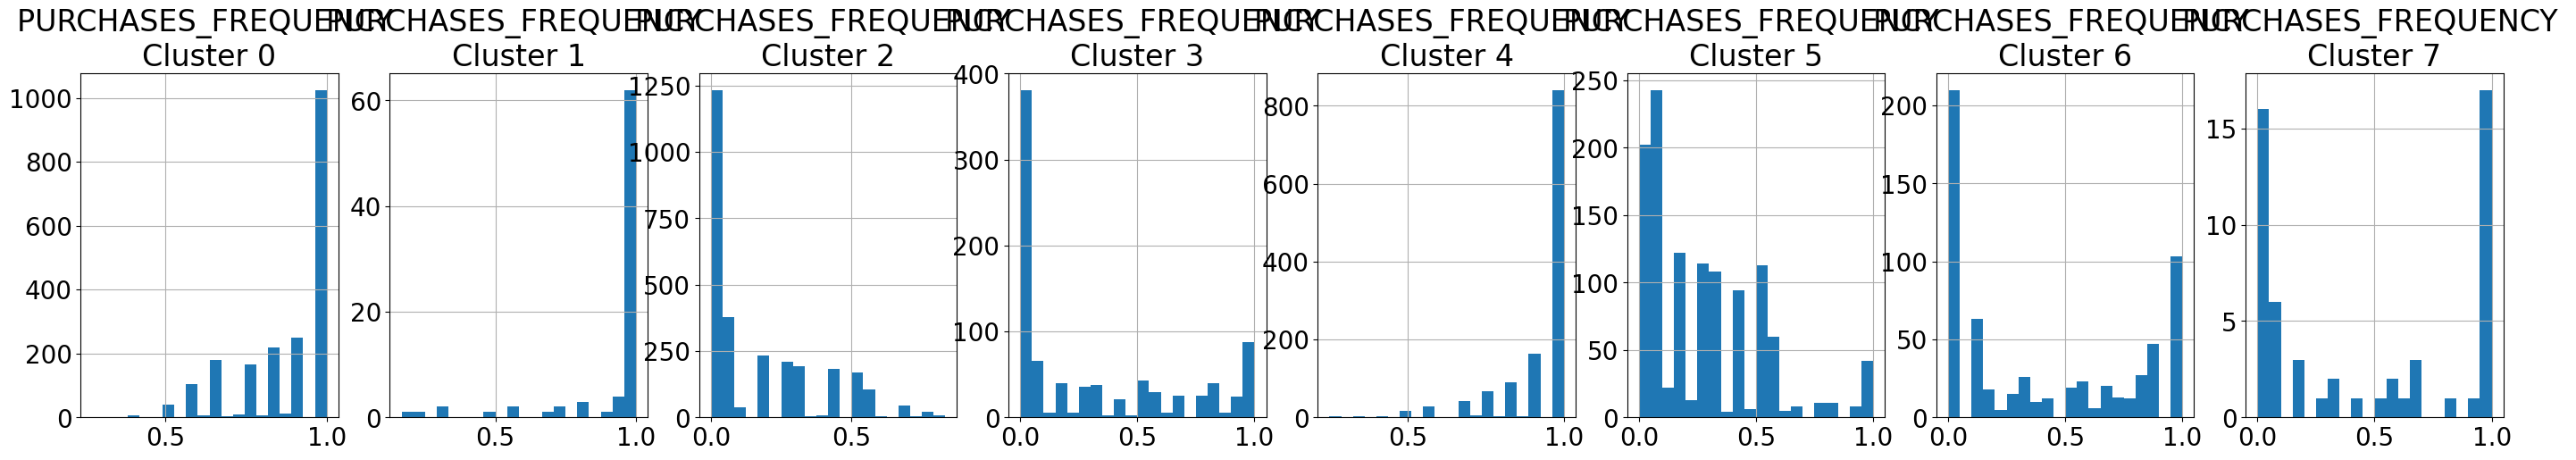

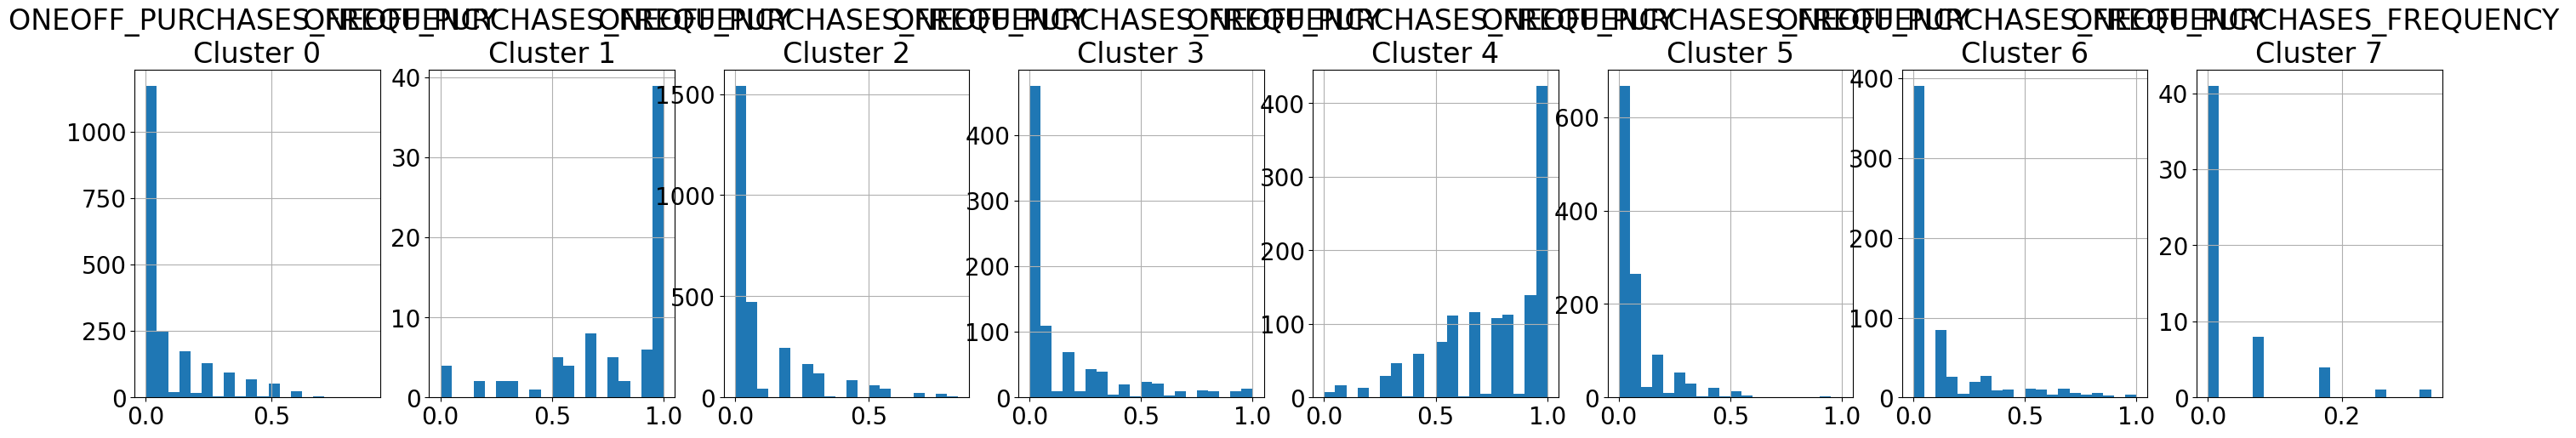

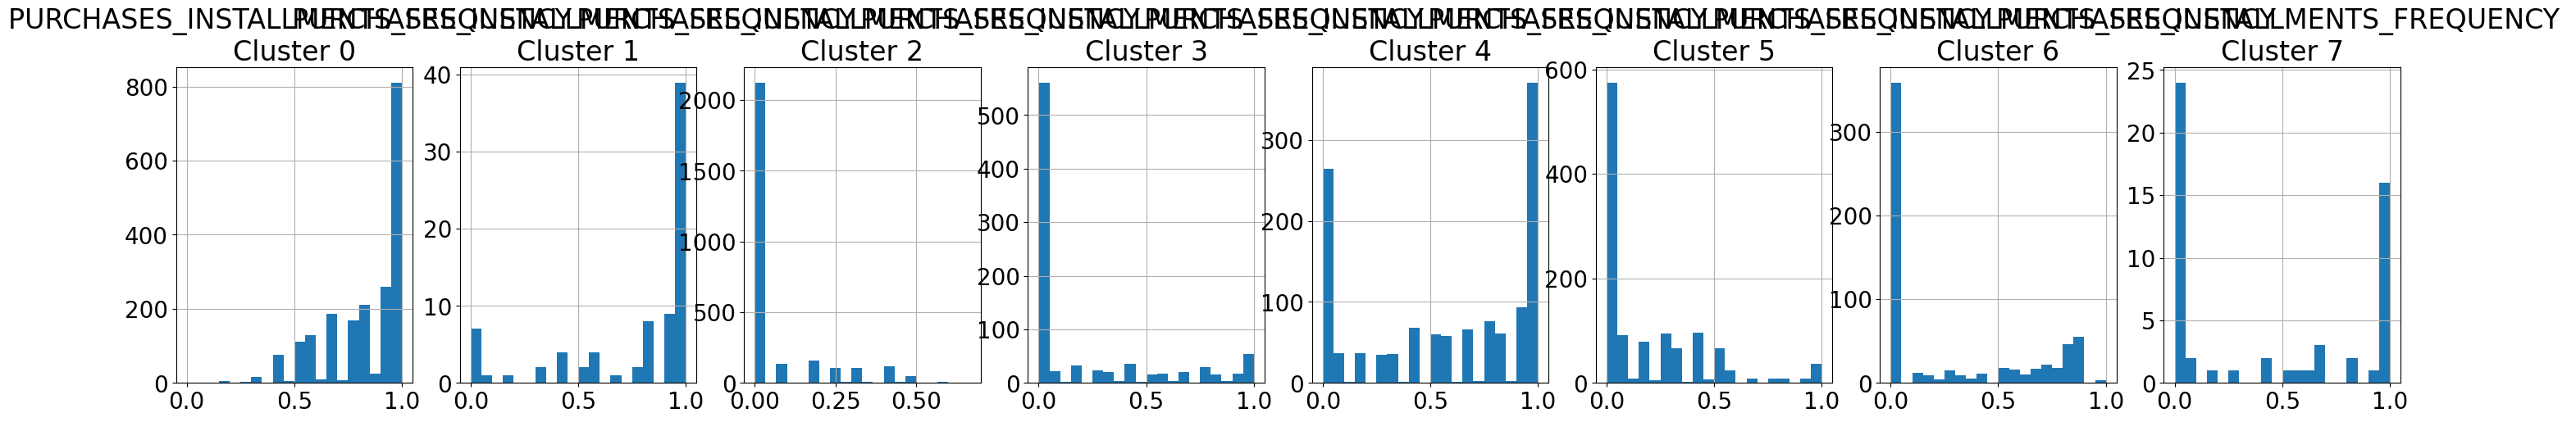

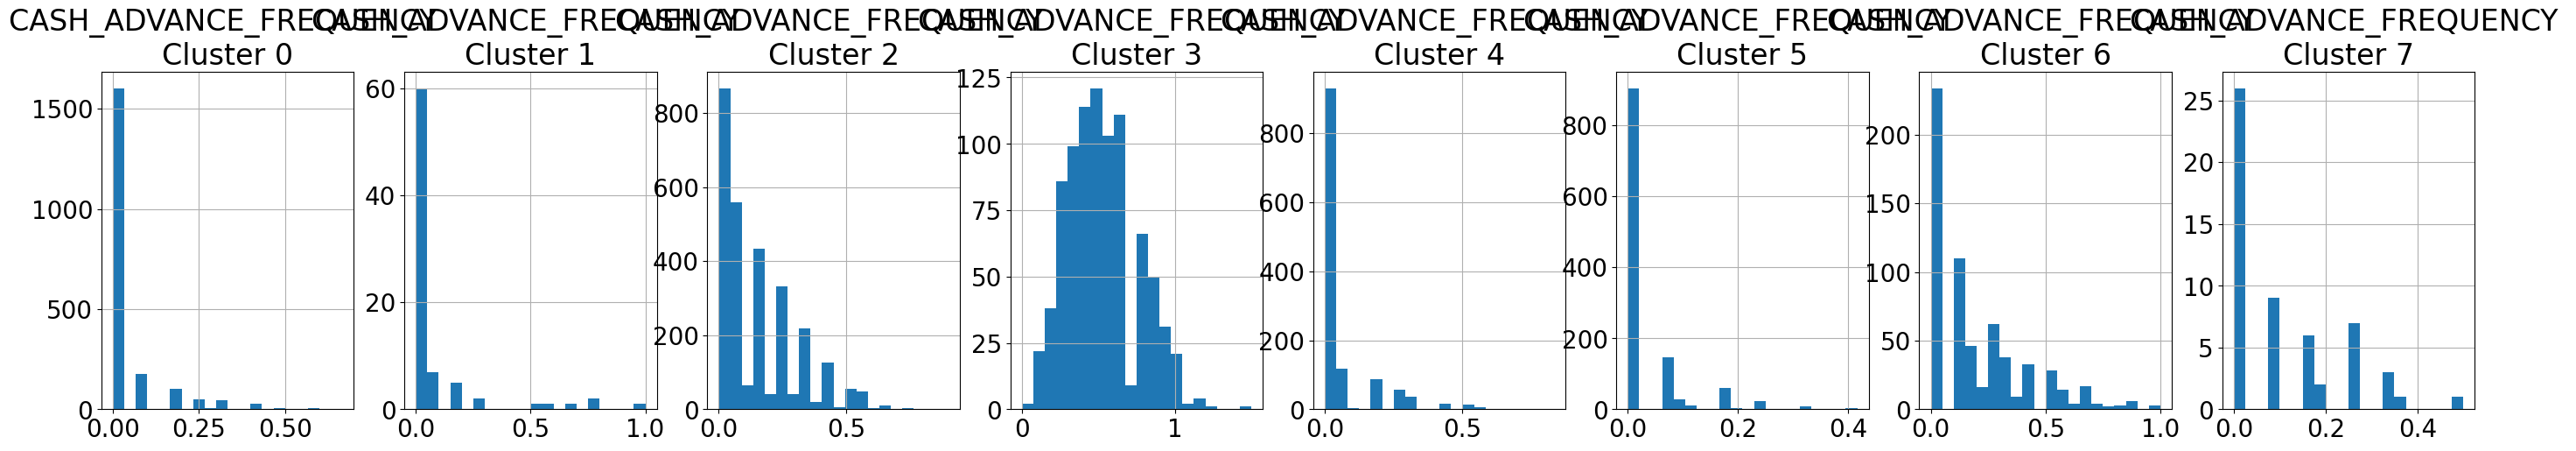

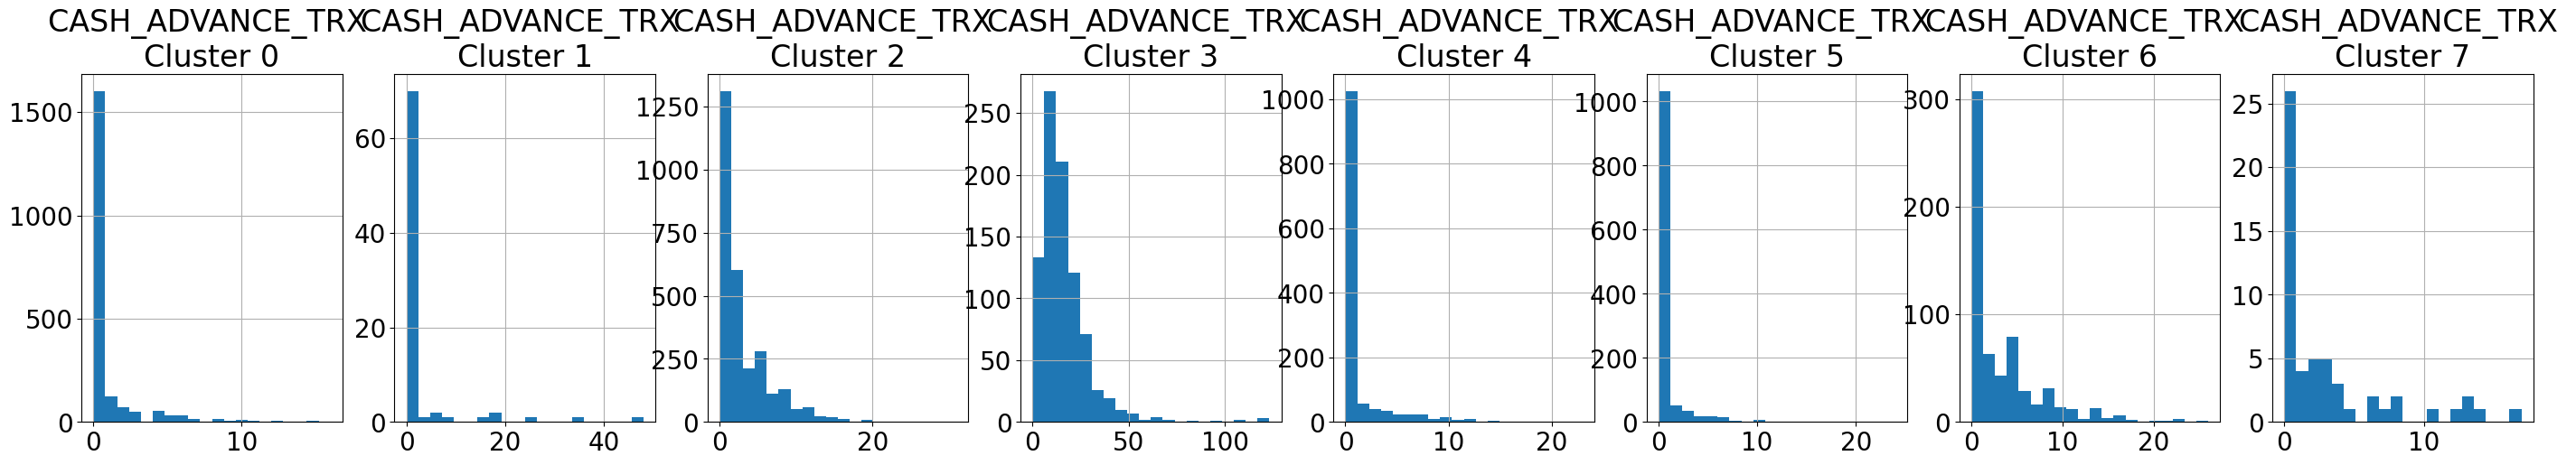

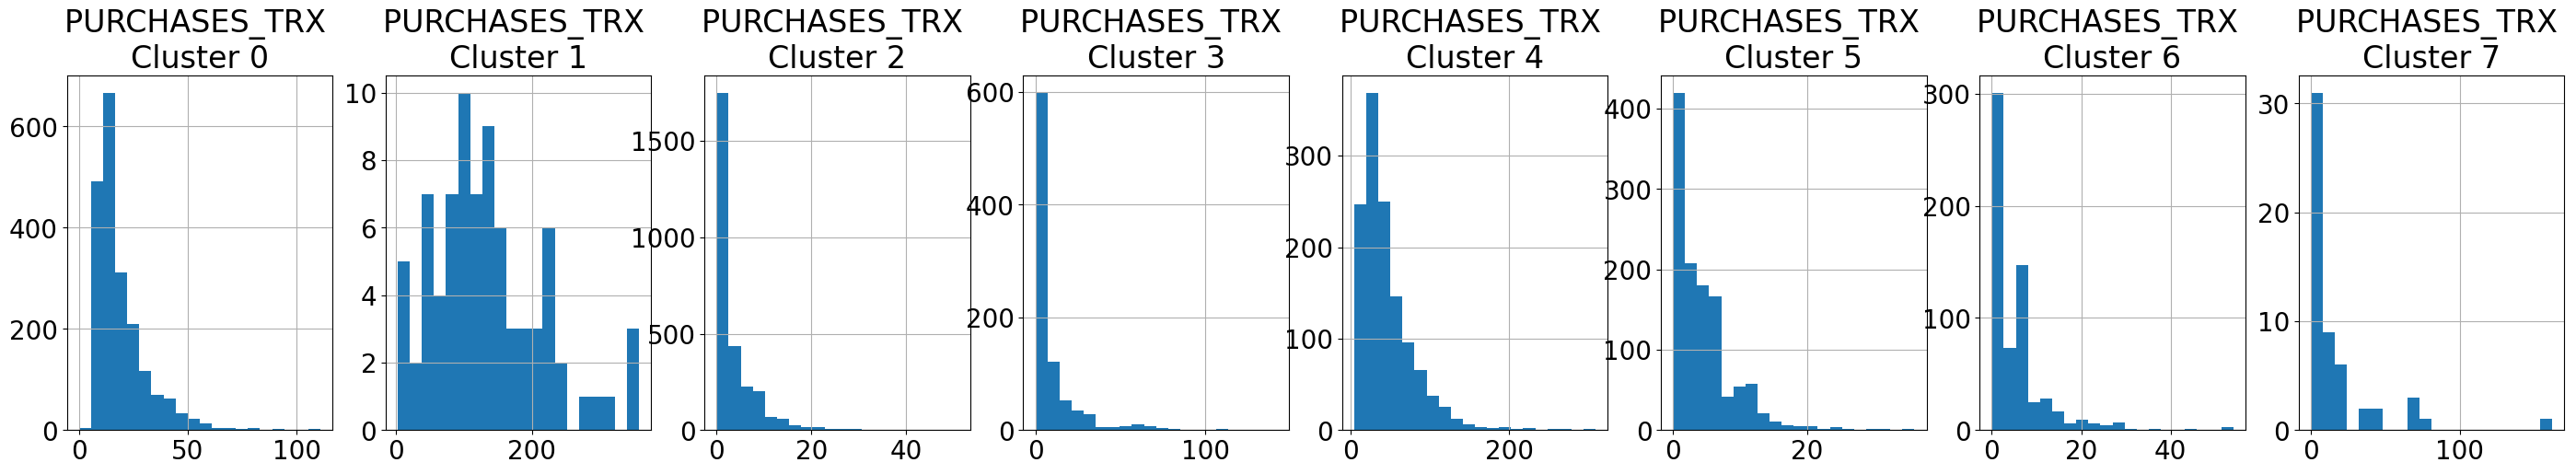

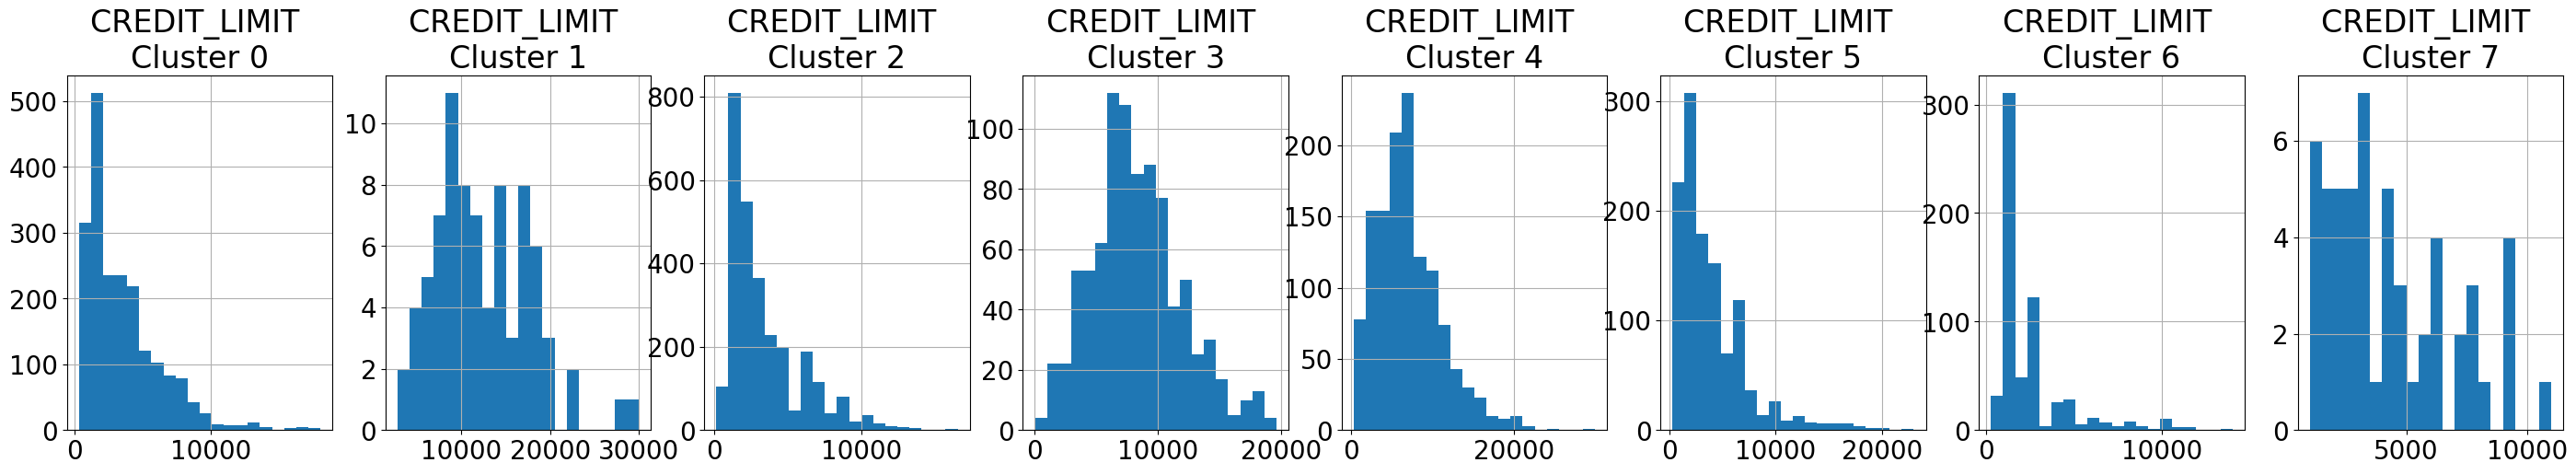

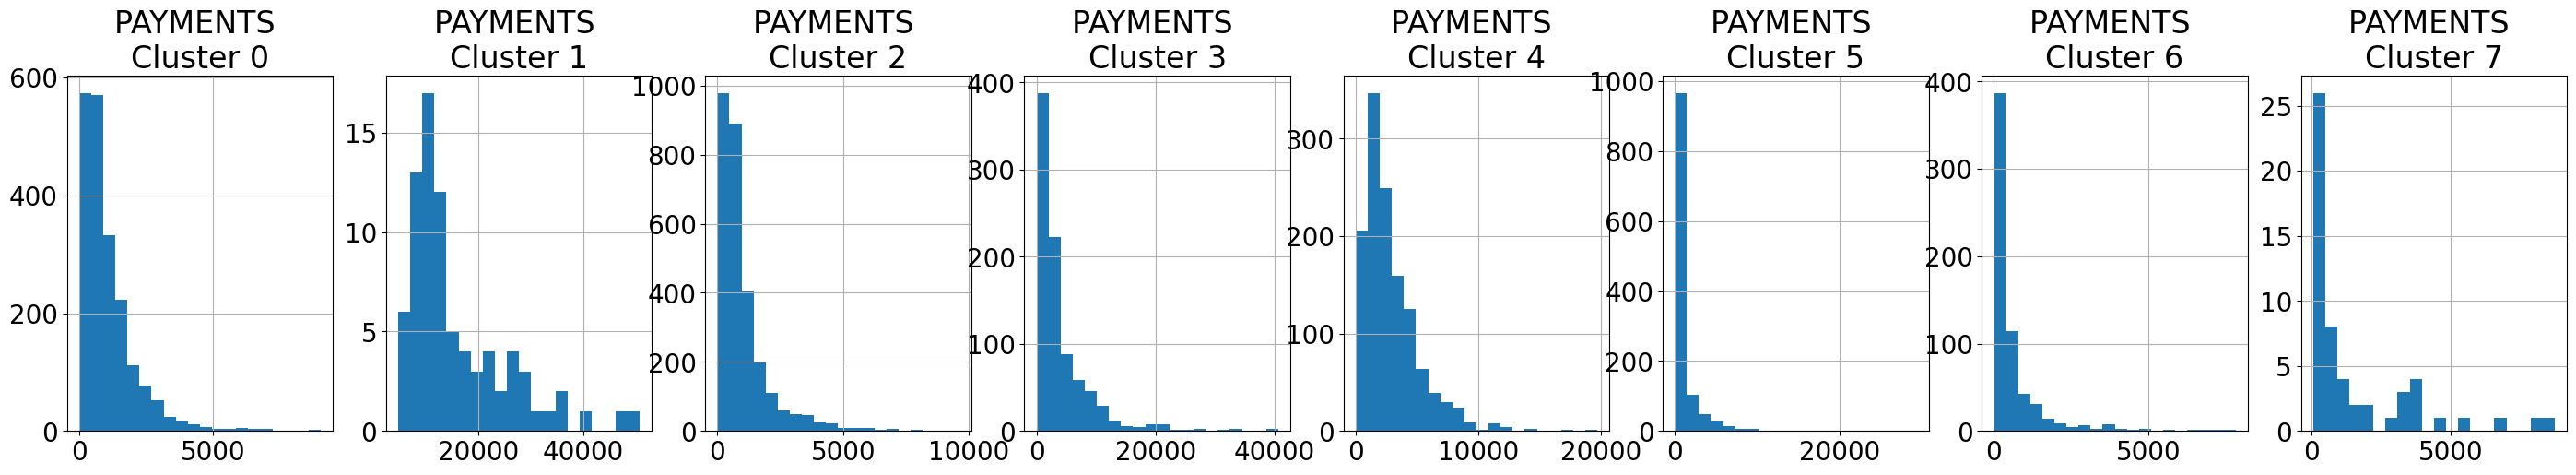

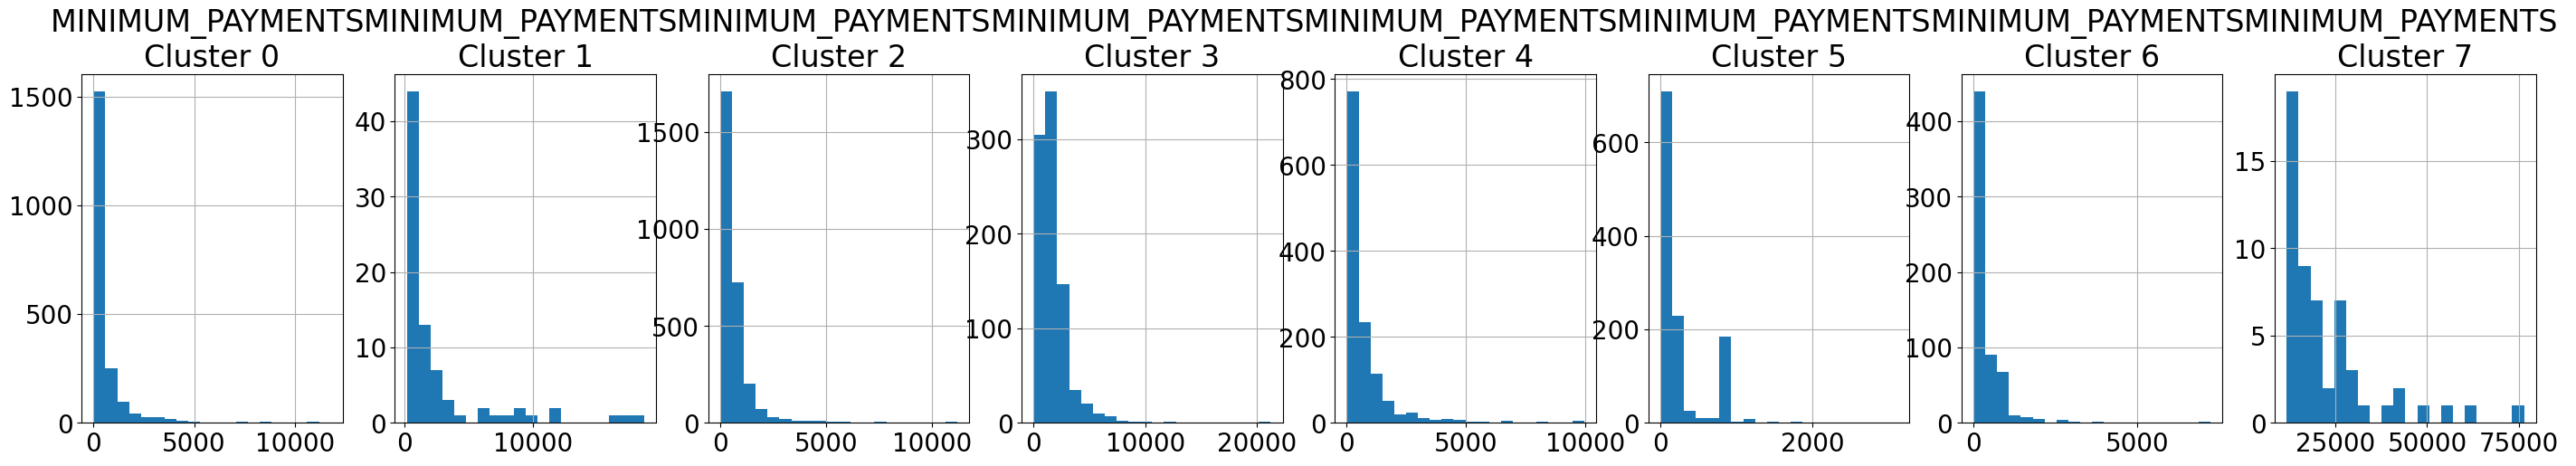

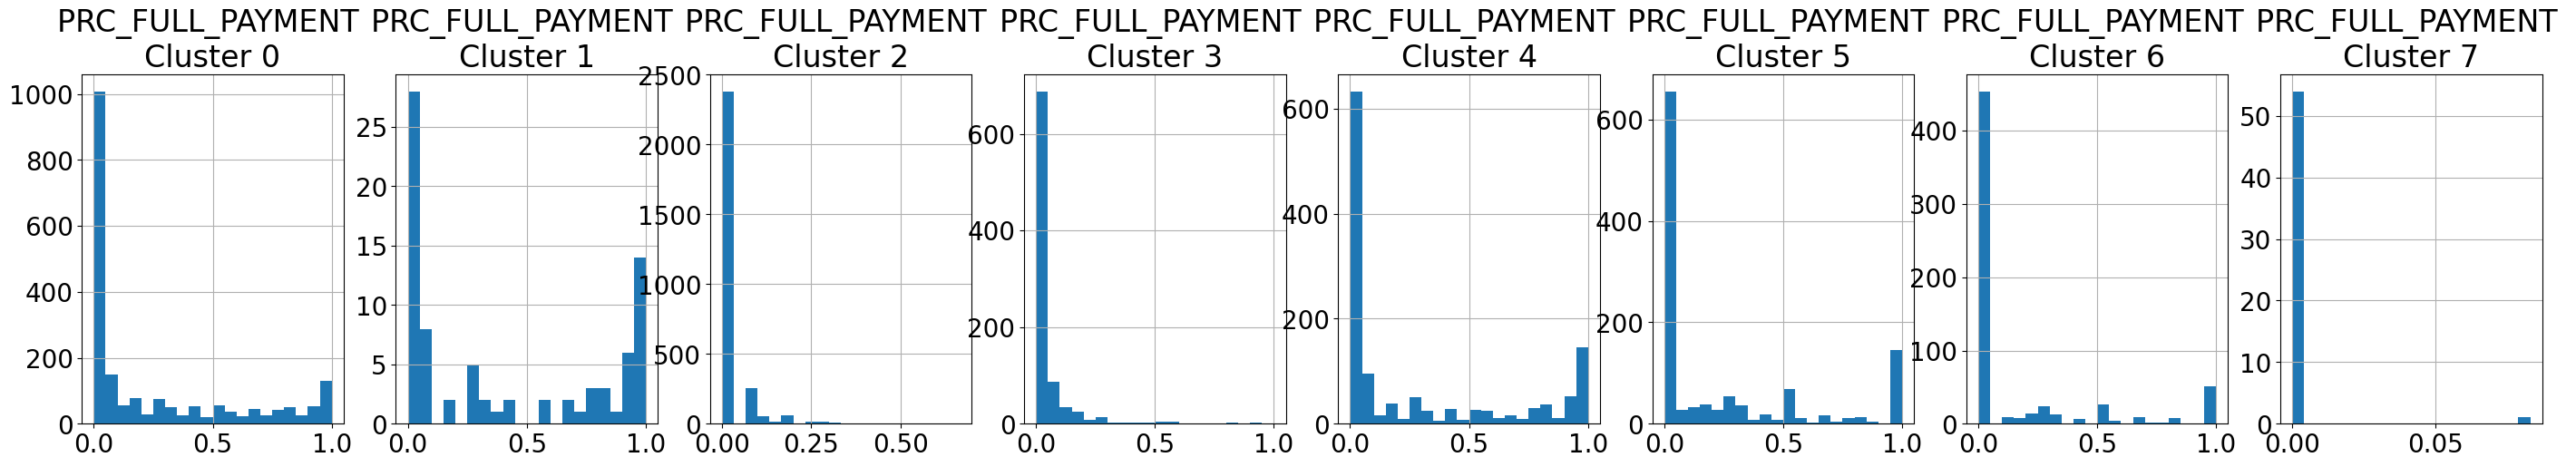

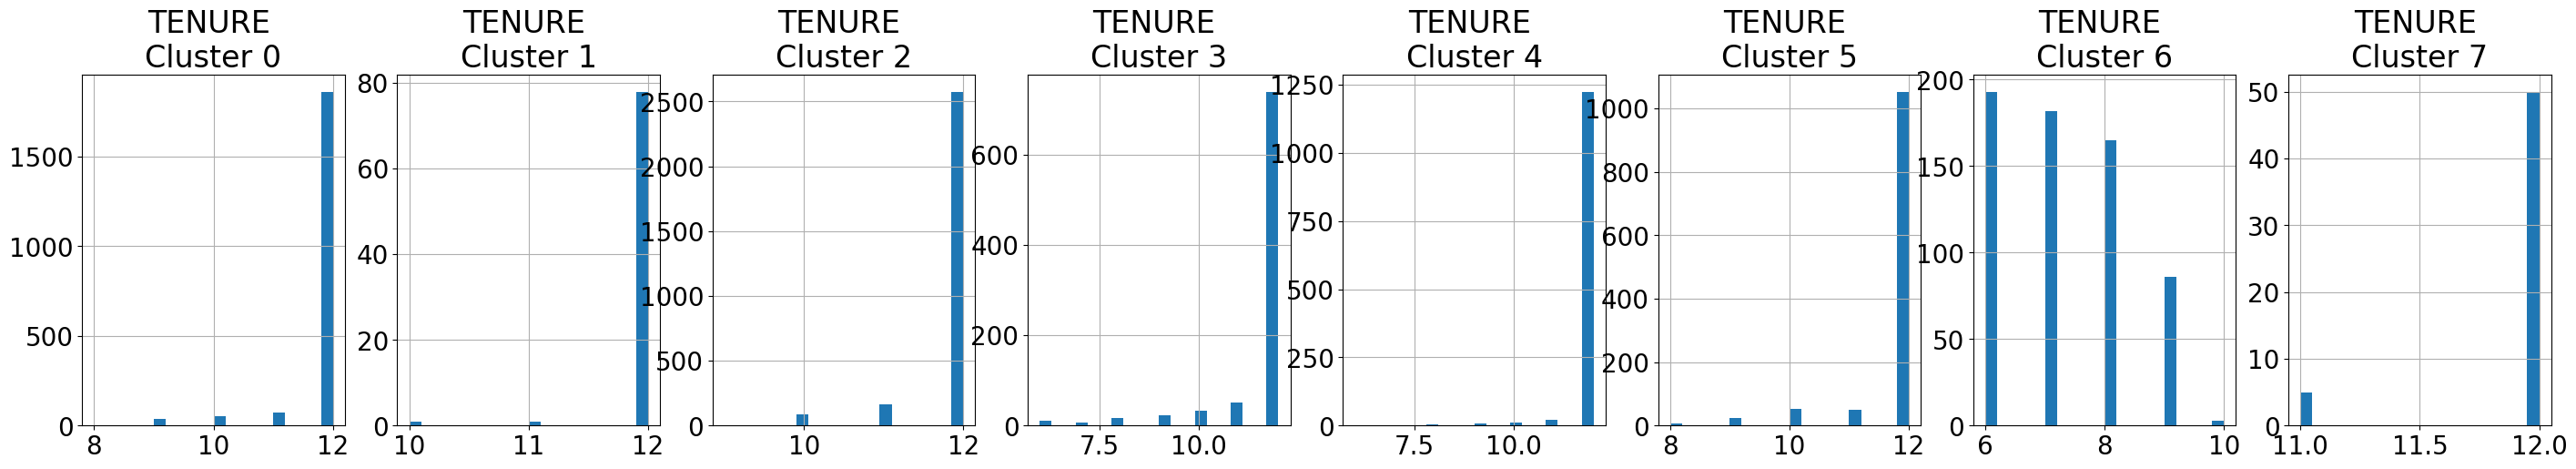

In [122]:
# Creates a graphical presentation showing per row all groups for each attribute
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [123]:
# sort_values(). Sort by the values along either axis.
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6368,1134.988498,1.000000,935.04,540.81,394.23,996.543937,0.916667,0.500000,0.750000,0.500000,15,20,4000.0,298.878026,235.549018,0.0,12,0
4631,9.431309,1.000000,80.44,0.00,80.44,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,2500.0,104.978170,67.789985,0.5,12,0
1634,49.416158,0.727273,590.00,350.00,240.00,0.000000,0.583333,0.083333,0.500000,0.000000,0,7,6000.0,836.812414,127.768461,1.0,12,0
4625,21.345298,0.727273,1019.00,119.00,900.00,0.000000,0.750000,0.083333,0.750000,0.000000,0,10,4500.0,1274.379409,161.692199,1.0,12,0
6670,5487.071216,1.000000,2435.09,518.05,1917.04,3052.710630,0.916667,0.083333,0.916667,0.333333,4,25,7500.0,1298.306155,1309.041902,0.0,12,0


In [124]:
# Return the last n rows.
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
150,7679.629040,1.0,4059.93,0.00,4059.93,555.469352,0.583333,0.000000,0.500000,0.166667,7,14,7000.0,3685.610620,12854.93970,0.0,12,7
519,1874.601636,1.0,305.78,0.00,305.78,0.000000,0.583333,0.000000,0.583333,0.000000,0,14,1500.0,518.757481,19977.00572,0.0,12,7
7837,1659.190866,1.0,770.90,0.00,770.90,1191.521187,1.000000,0.000000,0.916667,0.083333,1,24,2500.0,58.892213,13333.79401,0.0,12,7
6635,4972.108843,1.0,2072.57,45.65,2026.92,0.000000,1.000000,0.083333,1.000000,0.000000,0,37,4500.0,1497.318035,29019.80288,0.0,12,7
800,5359.980872,1.0,0.00,0.00,0.00,1113.868654,0.000000,0.000000,0.000000,0.250000,3,0,6000.0,638.144031,12866.94167,0.0,12,7


In [125]:
# Write object to a comma-separated values (csv) file.
credit_ordered.to_csv('cluster.csv')

## Application of PCA (principal component analysis) and visualization of results

#### PCA is an unsupervised learning algorithm.

#### Components are created using uncorrelated characteristics.

#### Finding a new set of features which are called components.

#### Applies dimensionality reduction, however, tries to keep the original information with the same characteristics.

In [126]:
pca = PCA(n_components=2) #n_components. Number of components to keep.
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222288, -1.0764542 ],
       [-1.13829625,  2.50648565],
       [ 0.96968876, -0.38348189],
       ...,
       [-0.92620717, -1.81079888],
       [-2.33655309, -0.657982  ],
       [-0.55641391, -0.40045046]])

In [127]:
# Create a dataframe for the principal components
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682223,-1.076454
1,-1.138296,2.506486
2,0.969689,-0.383482
3,-0.873633,0.043148
4,-1.599435,-0.688579


In [128]:
# Concatenate the two dataframes with the components and which cluster they belong to.
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682223,-1.076454,2
1,-1.138296,2.506486,3
2,0.969689,-0.383482,4
3,-0.873633,0.043148,2
4,-1.599435,-0.688579,2


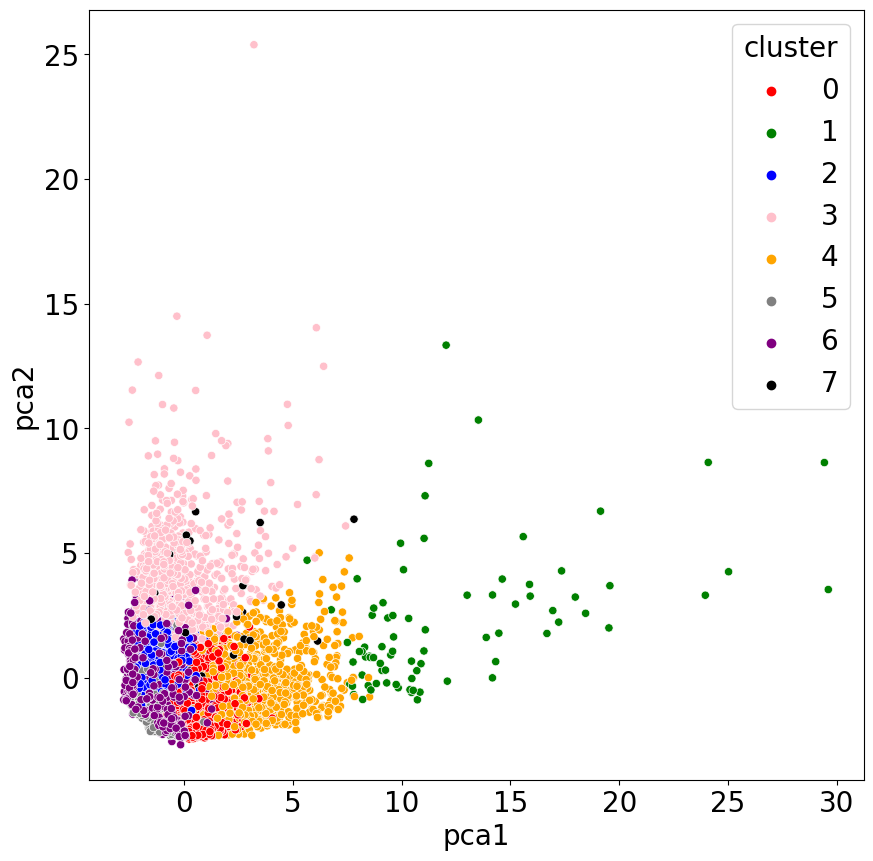

In [129]:
# Parameter hue of scatterplot. Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'orange', 'gray', 'purple', 'black']);

## Autoencoders

In [130]:
### Using autoencoders instead of using PCA.
### It is possible also combine the two.

In [131]:
# Return a tuple representing the dimensionality of the DataFrame.
creditcard_df_scaled.shape

(8950, 17)

In [132]:
# Use autoencoder to reduce 17 attributes to 10
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model # Model used for neural networking

2023-06-30 10:36:24.372275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 10:36:25.034790: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-30 10:36:25.034843: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-30 10:36:26.779963: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [133]:
input_df = Input(shape=(17,)) # input is the input layer, which 17 neurons, same number of the attributes
x = Dense(500, activation='relu')(input_df) # (input_df) entered says the input layer is connected to the Dense 500, it's a different form of syntax.
x = Dense(2000, activation='relu')(x) # dense means that the neuron is connected with all other neurons in the other layer.

encoded = Dense(10, activation='relu')(x) # information storage layer linked to the previous ones with (x).

# decoding
x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x) # layer decoded, output 17 registers.

2023-06-30 10:36:28.156853: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-30 10:36:28.156887: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-30 10:36:28.156913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (andre-Inspiron-15-3567): /proc/driver/nvidia/version does not exist
2023-06-30 10:36:28.157813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [134]:
# autoencoder
autoencoder = Model(input_df, decoded) # input_df is the first layer and decoded is the last layer

In [135]:
# encoder
encoder = Model(input_df, encoded) # Will store only the storage layer.

In [136]:
# loss = 'mean_squared_error' will square the error.
# compile. Configures the model for training.
# optimizer. Will adjust the weights.
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [137]:
# This builds the model for the first time
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)
# Used two times to compare the input with the input, creditcard_df_scaled

Epoch 1/50
280/280 [==============================] - 7s 22ms/step - loss: 0.2293
Epoch 2/50
280/280 [==============================] - 6s 22ms/step - loss: 0.1292
Epoch 3/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0813
Epoch 4/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0626
Epoch 5/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0591
Epoch 6/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0509
Epoch 7/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0520
Epoch 8/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0451
Epoch 9/50
280/280 [==============================] - 5s 20ms/step - loss: 0.0415
Epoch 10/50
280/280 [==============================] - 5s 20ms/step - loss: 0.0422
Epoch 11/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0691
Epoch 12/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0626
Epoch 13/50
2

In [138]:
# Shows data originals
creditcard_df_scaled.shape

(8950, 17)

In [139]:
# predict. Generates output predictions for the input samples.
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 2ms/step


In [140]:
# See that (8950, 10), now it is 10, before it was 17, so there was a reduction in dimensionality.
compact.shape

(8950, 10)

In [141]:
# returns 17 columns
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [142]:
# returns 10 columns
compact[0]

array([0.854843  , 1.0752789 , 0.31638062, 0.702353  , 0.        ,
       0.        , 0.273271  , 0.        , 0.5175342 , 0.        ],
      dtype=float32)

In [143]:
# Now only data with dimensionality reduction will be used
# Elbow method 
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact) # Elbow with the compressed data, that is, with dimensionality reduction
  wcss_2.append(kmeans.inertia_)

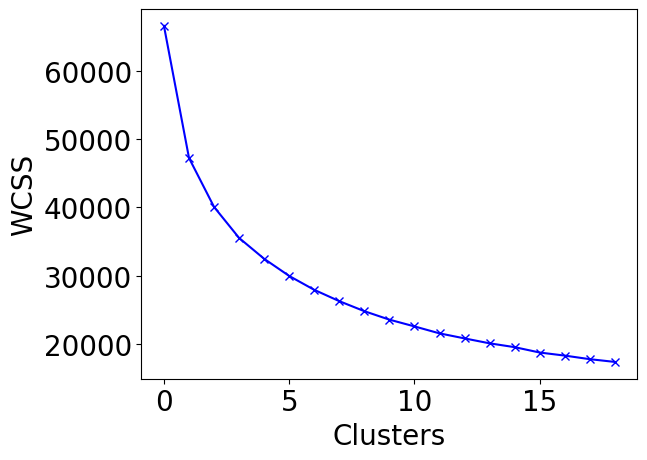

In [144]:
# Generate the elbow graph
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

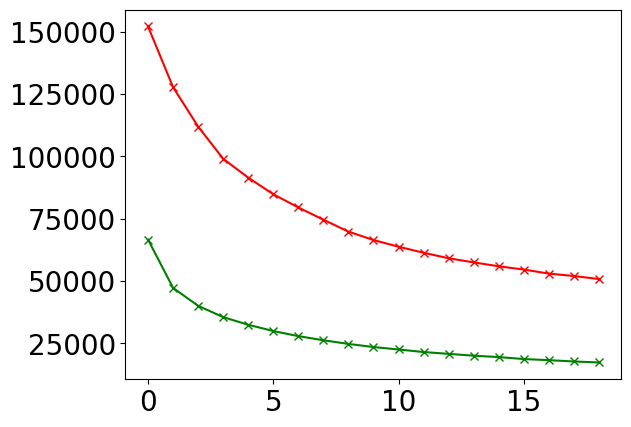

In [145]:
# Plotting of data clusters with dimensionality reduction and original data.
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [146]:
# When the dimensionality reduction occurs we can define a smaller number of clusters.
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [147]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 3, 1, ..., 2, 2, 2], dtype=int32), (8950,))

In [148]:
# concatenate with the original data and the new label variable. You send this dataframe to the marketing sector so they can run campaigns according to the cluster.
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [149]:
# PCA with dimensionality reduction
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.220898,-0.186212
1,1.146796,0.340924
2,-1.867450,0.510686
3,-1.673145,-0.021626
4,-1.202182,0.020162


In [150]:
# Concatenate the two dataframes with the components and which cluster they belong to.
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.220898,-0.186212,1
1,1.146796,0.340924,3
2,-1.867450,0.510686,1
3,-1.673145,-0.021626,1
4,-1.202182,0.020162,1


<Axes: xlabel='pca1', ylabel='pca2'>

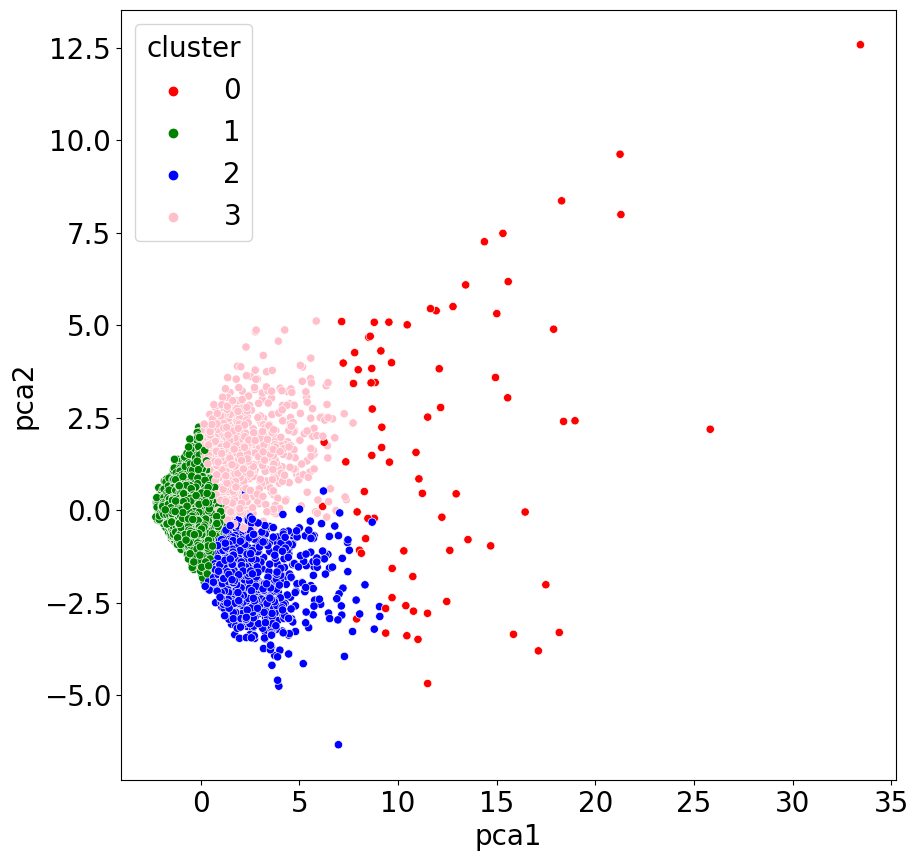

In [151]:
# It was a much clearer view of the clusters compared to the previous scatterplot.
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [152]:
# sort_values(). Sort by the values along either axis.
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
645,1482.235539,1.000000,14604.87,2475.93,12128.94,0.000000,1.0,0.583333,1.0,0.000000,0,219,15500.0,14462.630560,340.717801,1.000000,12,0
3698,3012.178613,1.000000,27790.42,14605.99,13184.43,469.074937,1.0,0.666667,1.0,0.083333,1,79,12000.0,27839.823540,569.401398,0.727273,12,0
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.0,0.750000,1.0,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12,0
5657,4628.109931,1.000000,912.54,0.00,912.54,0.000000,1.0,0.000000,1.0,0.000000,0,21,5000.0,3746.305759,56370.041170,0.000000,12,0
3846,975.637547,0.818182,6897.56,0.00,6897.56,0.000000,0.5,0.000000,0.5,0.000000,0,6,6150.0,8337.882098,6703.880744,0.272727,12,0


In [153]:
# Return the last n rows.
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
571,2627.184835,1.0,0.00,0.00,0.00,3216.192328,0.000000,0.0,0.000000,0.083333,7,0,3150.0,394.285767,10636.148390,0.00,12,3
574,3452.538704,1.0,11681.64,11681.64,0.00,0.000000,1.000000,1.0,0.000000,0.000000,0,141,10500.0,8145.713972,1198.614519,0.00,12,3
576,7295.920263,1.0,0.00,0.00,0.00,721.214369,0.000000,0.0,0.000000,0.250000,4,0,7500.0,1984.351035,3082.801095,0.00,12,3
565,4546.766836,1.0,3525.37,0.00,3525.37,0.000000,1.000000,0.0,1.000000,0.000000,0,66,15000.0,14083.968090,1442.933291,0.25,12,3
3980,3894.241117,1.0,1201.70,0.00,1201.70,995.062078,0.583333,0.0,0.583333,0.083333,2,7,4000.0,1734.235295,3618.939719,0.00,12,3


In [154]:
# !pip install xlwt
# xlwt. This is a library for developers to use to generate spreadsheet files compatible with Microsoft Excel versions 95 to 2003.
# send dataframe to an excel file
df_cluster_ordered.to_excel('cluster_ordereded.xls')